In [2]:
# №10.2 (а)
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

#Размер области
L = 20
#Время расчета 
T = 18
#Шаг по пространству
h = 0.5
#Число Куранта
#CFL = float(input())
CFL = float(input())
#Шаг по времени
tau = CFL*h

#Коэффициент наклона характеристик dx/dt = a = 1
a = 1
N = int(L/h)+1 #кол-во узлов
M = int(T/tau) + 1


y = np.zeros((M,N))
x = np.linspace(0, L, N)
print(x)

time = np.linspace(0,T,M)
print(time)

for i in range(0, N):
    y[0][i] = math.sin(4*math.pi * x[i]/L)

for j in range(1,M):
    for i in range(1, N):
        y[j][i] = y[j-1][i] + CFL*(y[j-1][i-1] - y[j-1][i])
    y[j][0] = y[j][N-1]
    
print(y)

clock = np.arange(0, len(time), 1)

frames = []
for c in clock:
    fig = plt.figure(figsize=(10, 10))
    plt.plot(x, np.array(y[c]), color='green')
    plt.title('Cхема уголок, CFL = {}'.format(CFL))
    
    plt.xlim([0, 20])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([-2,2])
    plt.ylabel('y(x)', fontsize = 14)
    
    plt.savefig('vm1_sem6_{}'.format(c))
    plt.close()
    '''frame = Image.open(f'C:/sers/PC/Downloads/vm1_sem6.png')
    frames.append(frame)'''
    
for frame_number in range(0, 38):
    # Открываем изображение каждого кадра.
    frame = Image.open(f'C:/sers/PC/Downloads/vm1_sem6_{frame_number}.png')
    # Добавляем кадр в список с кадрами.
    frames.append(frame)
    
frames[0].save(
    'vm1_sem6_gif.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=100,
    loop=0
)

0,6


ValueError: could not convert string to float: '0,6'

In [4]:
# №10.2 (б)
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

#Размер области
L = 20
#Время расчета 
T = 18
#Шаг по пространству
h = 0.5
#Число Куранта
#CFL = float(input())
CFL = float(input())
#Шаг по времени
tau = CFL*h

#Коэффициент наклона характеристик dx/dt = a = 1
a = 1
N = int(L/h)+1 #кол-во узлов
M = int(T/tau) + 1


y = np.zeros((M,N))
x = np.linspace(0, L, N)
print(x)

time = np.linspace(0,T,M)
print(time)

for i in range(0, N):
    y[0][i] = math.sin(4*math.pi * x[i]/L)

for j in range(1,M):
    for i in range(1, N-1):
        y[j][i] = y[j-1][i] - CFL*a*(y[j-1][i+1] - y[j-1][i-1])/2 + CFL**2 * a**2 * (y[j-1][i+1] - 2*y[j-1][i] + y[j-1][i-1])/2
    y[j][N-2] = y[j-1][N-2] - CFL*a*(y[j-1][N-2+1] - y[j-1][N-2-1])/2 + CFL**2 * a**2 * (y[j-1][N-2+1] - 2*y[j-1][N-2] + y[j-1][N-2-1])/2
    y[j][0] = y[j-1][0] - CFL*a*(y[j-1][0+1] - y[j-1][0-1])/2 + CFL**2 * a**2 * (y[j-1][0+1] - 2*y[j-1][0] + y[j-1][0-1])/2
    
print(y)

clock = np.arange(0, len(time), 1)

frames = []
for c in clock:
    fig = plt.figure(figsize=(10, 10))
    plt.plot(x, np.array(y[c]), color='blue')
    plt.title('Cхема Лакса-Вендрофа, CFL = {}'.format(CFL))
    
    plt.xlim([0, 20])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([-2,2])
    plt.ylabel('y(x)', fontsize = 14)
    
    plt.savefig('vm1_sem6_{}'.format(c))
    plt.close()
    '''frame = Image.open(f'C:/Users/User/vm1_sem6.png')
    frames.append(frame)'''
    
for frame_number in range(0, 37):
    # Открываем изображение каждого кадра.
    frame = Image.open(f'C:/Users/User/vm1_sem6_{frame_number}.png')
    # Добавляем кадр в список с кадрами.
    frames.append(frame)
    
frames[0].save(
    'vm1_sem6_gif2.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=100,
    loop=0
)

KeyboardInterrupt: Interrupted by user

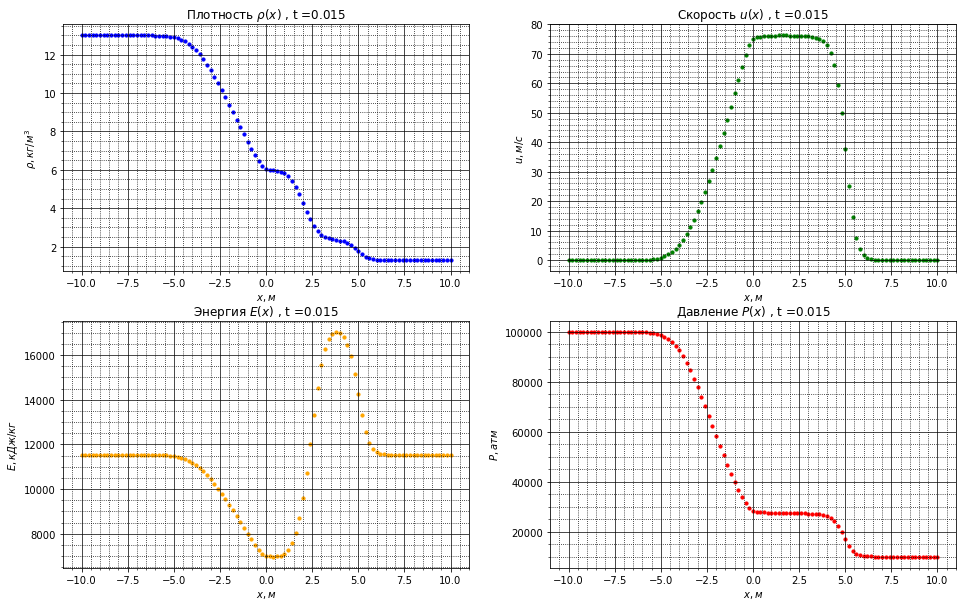

In [3]:
#Задача 2
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg as LA

#Начальные условия газа
#Слева
u_l = 0 #Скорость
rho_l = 13 #Плотность
P_l = 10**5 #Давление

#Справа
u_r = 0
rho_r = 1.3
P_r = 10**4

gamma = 5/3

#Энергия
E_l = P_l/((gamma-1)*rho_l)
E_r = P_r/((gamma-1)*rho_r)

#Задание сетки (x, t)
L = 10
time_max = 0.02
time = 0.015 #Интересующее нас время
N = 1000
M = 100

t = np.linspace(0, time_max, N+1)
tau = time_max/N #Шаг по времени

x = np.linspace(-L, L, M+1)
h = L/M #Шаг по пространству

t0 = 0
x0 = len(x)//2

#Вектор консервативных переменных
w = np.zeros([len(t)+1,len(x),3])
w_right = [np.array([rho_l, rho_l*u_l, rho_l*E_l]) for i in x[:x0]]
w_left = [np.array([rho_r, rho_r*u_r, rho_r*E_r]) for i in x[x0:]]
w[0] = w_right + w_left
w_l = lambda prev, curr, next, A, omega, omega_inv, Lambda: curr-tau*np.dot(A,(next-prev)/(2*h))+tau*np.dot(np.dot(np.dot(omega_inv,Lambda),omega),(next-2*curr+prev)/(2*h))

for i in range(len(t)):
    t0 += tau
    for j in range(len(x)):
        u = w[i][j][1]/w[i][j][0]
        E = w[i][j][2]/w[i][j][0]
        c = math.sqrt(gamma*(gamma-1)*E)
        omega = np.matrix([[-u*c,c,gamma-1], [-c**2,0,gamma-1], [u*c,-c,gamma-1]])
        omega_inv = inv(omega)
        A = np.array([[0, 1, 0], [-u**2, 2*u, gamma-1], [-gamma*u*E, gamma*E, u]]) #Матрица системы
        Lambda = np.diag([abs(u+c), abs(u), abs(u-c)])
        CFL = max(abs(u+c), abs(u), abs(u-c)) * tau/h
        if CFL > 1:
                print("Ошибка при выполнении, CFL = {}>1".format(CFL))
        if j == len(x)-1:
                w[i+1][j] = w_l(w[i][j-2], w[i][j-1], w[i][j], A, omega, omega_inv, Lambda)
        elif j == 0:
                w[i+1][j] = w_l(w[i][j], w[i][j+1], w[i][j+2], A, omega, omega_inv, Lambda)
        else:
                w[i+1][j] = w_l(w[i][j-1], w[i][j], w[i][j+1], A, omega, omega_inv, Lambda)
        if abs(t0 - time) < 10**(-6): 
            vals = []
            for s in range(len(x)):
                vals.append([w[i][s][0],w[i][s][1],w[i][s][2]])

#Переход от консервативных переменных к параметрам газа                
rho = []
u = []
E = []
P = []
for ind in vals:
    rho.append(ind[0])
    u.append(ind[1]/ind[0])
    E.append(ind[2]/ind[0])
    P.append((gamma - 1)*ind[2])

    
#Построение графиков
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(16)
plt.subplots_adjust(wspace=0.2)
    
ax1.scatter(x,rho, color = 'blue', s=10)
ax1.set_title('Плотность $\u03C1 (x)$ , t ={}'.format(time))
ax1.set_xlabel('$x, м$')
ax1.set_ylabel('$\u03C1 , кг/м^3$')
ax1.minorticks_on()
ax1.grid(which='major',
        color = 'k', 
        linewidth = 0.7)
ax1.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax2.scatter(x,u, color = 'green', s=10)
ax2.set_title('Скорость $u(x)$ , t ={}'.format(time))
ax2.set_xlabel('$x, м$')
ax2.set_ylabel('$u, м/c$')
ax2.minorticks_on()
ax2.grid(which='major',
        color = 'k', 
        linewidth = 0.7)
ax2.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax3.scatter(x,E, color = 'orange', s=10)
ax3.set_title('Энергия $E(x)$ , t ={}'.format(time))
ax3.set_xlabel('$x, м$')
ax3.set_ylabel('$E, кДж/кг$')
ax3.minorticks_on()
ax3.grid(which='major',
        color = 'k', 
        linewidth = 0.7)
ax3.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

ax4.scatter(x,P, color = 'red', s=10)
ax4.set_title('Давление $P(x)$ , t ={}'.format(time))
ax4.set_xlabel('$x, м$')
ax4.set_ylabel('$P, атм$')
ax4.minorticks_on()
ax4.grid(which='major',
        color = 'k', 
        linewidth = 0.7)
ax4.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
